# Pull Request DTW

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tslearn import metrics
import os
from sklearn.preprocessing import normalize

In [2]:
pr_files = [file for file in os.listdir() if 'cleaned.pk1' in file]
pr_files

['adamsmith_pr_cleaned.pk1',
 'embulk_pr_cleaned.pk1',
 'google_pr_cleaned.pk1',
 'guillaume_pr_cleaned.pk1',
 'iven_pr_cleaned.pk1',
 'oleiade_pr_cleaned.pk1',
 'pandas_pr_cleaned.pk1',
 'yang_pr_cleaned.pk1']

In [3]:
# Check shape
for file in pr_files:
    print(file, pd.read_pickle(file).shape)

adamsmith_pr_cleaned.pk1 (1, 13)
embulk_pr_cleaned.pk1 (786, 13)
google_pr_cleaned.pk1 (134, 13)
guillaume_pr_cleaned.pk1 (3, 13)
iven_pr_cleaned.pk1 (8, 13)
oleiade_pr_cleaned.pk1 (46, 13)
pandas_pr_cleaned.pk1 (12797, 16)
yang_pr_cleaned.pk1 (12, 13)


In [4]:
adamsmith = pd.read_pickle(pr_files[0])
embulk = pd.read_pickle(pr_files[1])
google = pd.read_pickle(pr_files[2])
guillaume = pd.read_pickle(pr_files[3])
iven = pd.read_pickle(pr_files[4])
oleiade = pd.read_pickle(pr_files[5])
pandas = pd.read_pickle(pr_files[6])
yang = pd.read_pickle(pr_files[7])

In [5]:
adamsmith.head()

,authorAssociation,bodyText,closedAt,comments,createdAt,resourcePath,state,title,updatedAt,author,company,files,mergedBy
0,OWNER,Test PR,NaT,"{'totalCount': 1, 'nodes': [{'author': {'login...",2019-05-21 18:31:23+00:00,/adamsmith/game-theory-poker/pull/1,OPEN,Update DoShowdowns.java,2019-05-21 18:31:25+00:00,adamsmith,@kiteco,1,NaN


# Monthly Count

In [6]:
def monthly_count(df):
    
    # Change to pandas datetime object
    df['createdAt'] =  df['createdAt'].apply(pd.Timestamp)
    df['closedAt'] =  df['closedAt'].apply(pd.Timestamp)
    
    # Group by committedDate's month and get the count
    df_group = df.groupby(df['createdAt'].dt.to_period('M')) \
                                                 .count()['title'] \
                                                 .reset_index() \
                                                 .rename(columns={'title': 'countByMonth'})
    
    # Normalize count and create a insert back into df_group
    df_group['countByMonthNorm'] = normalize([df_group['countByMonth']])[0]
    
    return df_group

In [7]:
adamsmith_pr = monthly_count(adamsmith)
embulk_pr = monthly_count(embulk)
google_pr = monthly_count(google)
guillaume_pr = monthly_count(guillaume)
iven_pr = monthly_count(iven)
oleiade_pr = monthly_count(oleiade)
pandas_pr = monthly_count(pandas)
yang_pr = monthly_count(yang)

C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Convertin

# Dynamic Time Warping

In [8]:
from tslearn.metrics import dtw_path

In [9]:
monthly_pr_list = [adamsmith_pr, embulk_pr, google_pr, guillaume_pr, iven_pr, oleiade_pr, pandas_pr, yang_pr]
monthly_pr_list_str = ['adamsmith_pr', 'embulk_pr', 'google_pr', 'guillaume_pr', 'iven_pr', 'oleiade_pr', 'pandas_pr', 'yang_pr']

### Calculate DTW

In [10]:
def calc_dtw(pr_num):
    dtw = []
    path = []

    for el in range(len(monthly_pr_list)):
        dtw_pathing = dtw_path(monthly_pr_list[pr_num].iloc[:,-1].tolist(), monthly_pr_list[el].iloc[:,-1].tolist())
        dtw.append((monthly_pr_list_str[pr_num], monthly_pr_list_str[el], dtw_pathing[1]))
        path.append((monthly_pr_list_str[pr_num], monthly_pr_list_str[el], dtw_pathing[0]))
        
    return dtw, path

In [11]:
dtw_1, path_1 = calc_dtw(1)

In [12]:
dtw_1

[('embulk_pr', 'adamsmith_pr', 6.6262339773821),
 ('embulk_pr', 'embulk_pr', 0.0),
 ('embulk_pr', 'google_pr', 0.4811666946880229),
 ('embulk_pr', 'guillaume_pr', 2.680476629915532),
 ('embulk_pr', 'iven_pr', 1.2701481265973096),
 ('embulk_pr', 'oleiade_pr', 0.7712999963507984),
 ('embulk_pr', 'pandas_pr', 0.5173608211438785),
 ('embulk_pr', 'yang_pr', 1.1211304683488668)]

### Plot

In [13]:
def plot_graph(dtw, start_dtw, compare_dtw):
    print(dtw[compare_dtw])
    monthly_pr_list[start_dtw].plot(x='createdAt', y='countByMonthNorm')
    monthly_pr_list[compare_dtw].plot(x='createdAt', y='countByMonthNorm')

('embulk_pr', 'pandas_pr', 0.5173608211438785)


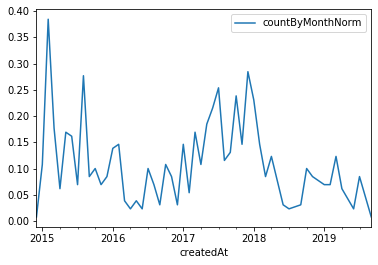

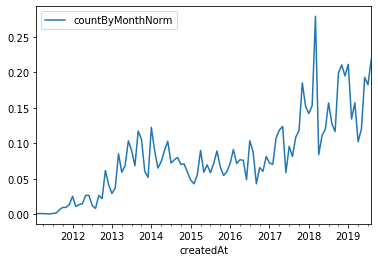

In [14]:
plot_graph(dtw_1, 1, 6)

### Make Dictionary

In [15]:
def make_dict(num):
    
    dtw_1, path_1 = calc_dtw(num)
    my_dict = {dtw_1[i][1]:dtw_1[i][2] for i in range(len(dtw_1))}
    
    return my_dict

In [16]:
adamsmith_dict = make_dict(0)
embulk_dict = make_dict(1)
google_dict = make_dict(2)
guillaume_dict = make_dict(3)
iven_dict = make_dict(4)
oleiade_dict = make_dict(5)
pandas_dict = make_dict(6)
yang_dict = make_dict(7)


dict_list = [adamsmith_dict, embulk_dict, google_dict, guillaume_dict, iven_dict, 
             oleiade_dict, pandas_dict, yang_dict]

### Make DF

In [18]:
df = pd.Series()
for el in range(len(dict_list)):
    df = pd.concat([df, pd.Series(dict_list[el], name=monthly_pr_list_str[el])], axis=1)
df = df.drop(columns=0)

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
df

,adamsmith_pr,embulk_pr,google_pr,guillaume_pr,iven_pr,oleiade_pr,pandas_pr,yang_pr
adamsmith_pr,0.000000,6.626234,5.579035,0.562777,0.928516,3.048672,9.182422,1.970579
embulk_pr,6.626234,0.000000,0.481167,2.680477,1.270148,0.771300,0.517361,1.121130
google_pr,5.579035,0.481167,0.000000,2.317763,1.148698,0.737693,0.617818,0.939167
guillaume_pr,0.562777,2.680477,2.317763,0.000000,0.520070,1.137400,3.760120,0.728220
iven_pr,0.928516,1.270148,1.148698,0.520070,0.000000,0.862924,1.483738,0.593780
oleiade_pr,3.048672,0.771300,0.737693,1.137400,0.862924,0.000000,0.847836,0.537964
pandas_pr,9.182422,0.517361,0.617818,3.760120,1.483738,0.847836,0.000000,1.514482
yang_pr,1.970579,1.121130,0.939167,0.728220,0.593780,0.537964,1.514482,0.000000


In [20]:
df.to_csv('pr_dtw.csv', index=False)

# [Hiearchical Clustering](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


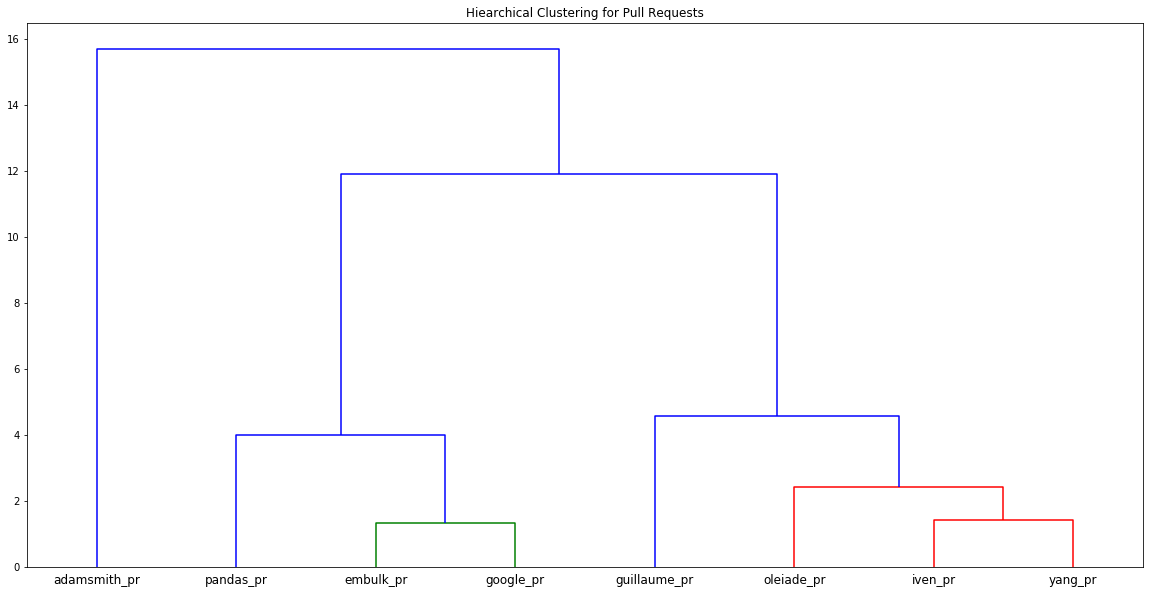

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df.as_matrix(), 'ward')
labelList = df.index

plt.figure(figsize=(20, 10))
plt.title('Hiearchical Clustering for Pull Requests')
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            color_threshold=2.5)
plt.show()

# [Agglomerative Clustering](https://medium.com/@sametgirgin/hierarchical-clustering-model-in-5-steps-with-python-6c45087d4318)

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\Dustin\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


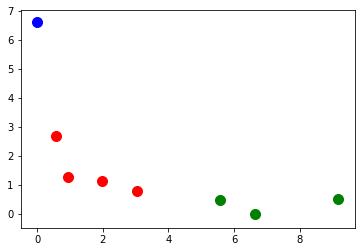

In [35]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

X = df.as_matrix()

y = hc.fit_predict(X)

plt.scatter(X[y==0, 0], X[y==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y==2, 0], X[y==2, 1], s=100, c='green', label ='Cluster 3')

In [36]:
y

array([1, 2, 2, 0, 0, 0, 2, 0], dtype=int64)

In [37]:
df.columns

Index(['adamsmith_pr', 'embulk_pr', 'google_pr', 'guillaume_pr', 'iven_pr',
       'oleiade_pr', 'pandas_pr', 'yang_pr'],
      dtype='object')